# **Weisfeiler-Lehman Kernels**

Weisfeiler-Lehman Kernels are proposed in the paper [Weisfeiler Lehman Graph Kernels](https://www.jmlr.org/papers/volume12/shervashidze11a/shervashidze11a.pdf). Following note book has four sections



1.   Loading Graph Dataset 
2.   Weisfeiler-Lehman test for Isomorphism
3.   key insight: Weisfeiler-Lehman Kernel Framework

      *   Weisfeiler-Lehman Subtree Kernel 
      *   Weisfeiler-Lehman Edge Kernel
      *   Weisfeiler-Lehman Shortest Path Kernel
            

In [ ]:
#install python-igraph : we use IGraph for manipulating and storing graph data

!pip install python-igraph
!pip install cairocffi

     |████████████████████████████████| 3.1MB 10.6MB/s 
     |████████████████████████████████| 71kB 4.7MB/s 
  Created wheel for cairocffi: filename=cairocffi-1.2.0-cp37-none-any.whl size=89548 sha256=a7f6722f7a1a59b2d0d442d970f7084d04e5aa5c24067cabf613daf051b5a84d
  Stored in directory: /root/.cache/pip/wheels/40/76/48/f1effadceea83b32e7d957dd0f92db4db8b537d7b72b4ef374
Successfully built cairocffi


In [ ]:
import os
import igraph as ig
from collections import Counter
from IPython.core.display import display, Image

In [ ]:
#mounting the data  on drive 

from google.colab import drive
drive.mount('/content/drive')
path = 'data/graph_data'

Mounted at /content/drive


In [ ]:
#retreving the file names
def get_data(path):
  graph_files = []
  for file in os.listdir(path):
    if file.endswith('gml'):
        graph_files.append(os.path.join(path,file))
  graph_files.sort()
  return graph_files
  

In [ ]:
def read_gml(filename):
  node_features = []
  g = ig.read(filename)
  if not 'label' in g.vs.attribute_names():
    g.vs['label'] = list(map(str,[l for l in g.vs.degree()]))
  node_features = g.vs['label']
  adj_mat  = np.asarray(g.get_adjacency().data)  
  return node_features,adj_mat

In [ ]:
#making sure that multiple igraph plots are shown in single jupyter cell

def plot(G,id):
  print("Graph "+id,end= "\n\n")
  ig.plot(G,bbox = (200, 200)).save('temporary.png') 
  display(Image(filename='temporary.png'))
  os.remove('temporary.png')

Graph G1



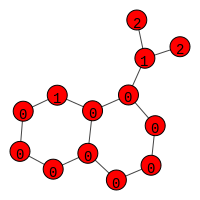

Graph G2



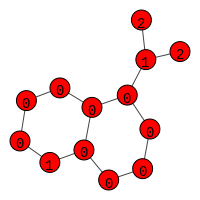

In [ ]:
#sample graph

path = '/content/drive/MyDrive/data/graph_data/MUTAG'
graph_files = get_data(path)
G0 = ig.read(graph_files[1])
G1 = ig.read(graph_files[2])
plot(G0,"G1")
plot(G1,"G2")

## Checking for Isomoprhism of Graphs using 1D WL test 

In [ ]:
#does label compression 
def f(global_unique_labels,unique_labels):


  new_labels = {}
  for s_v in unique_labels:

    if s_v in global_unique_labels.keys():
      new_labels.update({ s_v : global_unique_labels[s_v] })

    else :
      new_label  = str(len(global_unique_labels)+1)
      new_labels.update({ s_v  : new_label })    
      global_unique_labels.update({ s_v : new_label })

  return new_labels



In [ ]:
#does one iteration of WL test for Isomorphism 
def update_compressed_code(G,global_unique_labels):

  '''
      Parameters 
      G : Ipython Graph 
      global_labels : dictionary containing 

      Returns 

  '''

  
  multiset_g = list()
  for v in G.vs:

    multiset_v = list()
    #multiset-label determination
    for neigh in G.neighbors(v):
      multiset_v.append(G.vs[neigh]['label'])

    #sorting each multiset  
    multiset_v.sort() 
    multiset_v.insert(0,v['label'])
    multiset_g.append(tuple(multiset_v))  #lists are not hashable so convert into tuples


  #getting unique multiset labels
  unique_multiset_g = list(set(multiset_g))


  #label-compression and relabeling
  new_labels = f(global_unique_labels,unique_multiset_g)
  for idx,v in enumerate(G.vs):
    v['label'] = new_labels[multiset_g[idx]]

 
    
  return G.vs['label']  




In [ ]:
def checkcanonicalform(G1,G2):
  '''

  '''
  labels_1 = G1.vs['label']
  labels_2 = G2.vs['label']
  canonical_form_1 = Counter(map(tuple,labels_1))
  canonical_form_2 = Counter(map(tuple,labels_2))

  return canonical_form_1 == canonical_form_2



In [ ]:
#1d version of weisfeiler-lehman test for isomorphism 
def weisfeiler_lehman_test(G1,G2):

  '''
    Parameters 
      Gs : list of graphs

    Returns
      false  :  If G1,G2 are not isomorphic 
      None   :  inconclusive , G1,G2 could be isomophic or not  
  '''



  #pre-processing and intial check. copy() does deep copy
  G1 = G1.copy() 
  G2 = G2.copy()
  for idx,v in enumerate(G1.vs):
    v['label'] = str(1)
  for idx,v in enumerate(G2.vs):
    v['label'] = str(1)  

  if(not checkcanonicalform(G1,G2)):
      return False

  nv = G1.vcount()
  for i in range(nv):
    print("Iteration :"+str(i))
    global_unique_labels = {}  #unique dict is used for each iteration
    new_labels_1 = update_compressed_code(G1,global_unique_labels)
    new_labels_2 = update_compressed_code(G2,global_unique_labels)


    plot(G1,"G1")
    plot(G2,"G2")
    if(not checkcanonicalform(G1,G2)):
      return False

  return None


Iteration :0
Graph G1



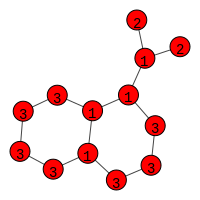

Graph G2



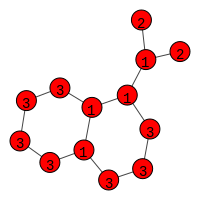

Iteration :1
Graph G1



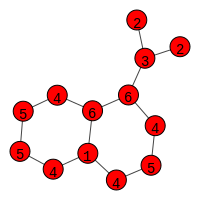

Graph G2



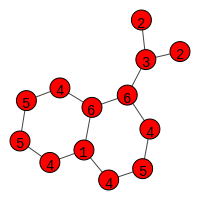

Iteration :2
Graph G1



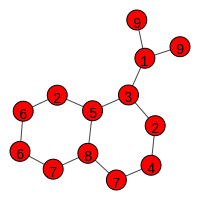

Graph G2



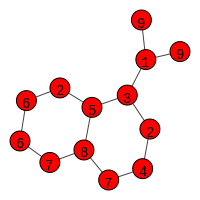

Iteration :3
Graph G1



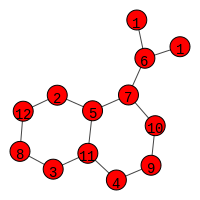

Graph G2



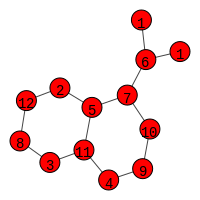

Iteration :4
Graph G1



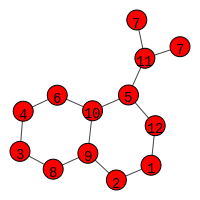

Graph G2



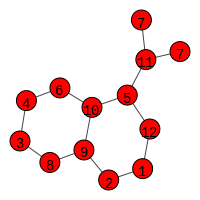

Iteration :5
Graph G1



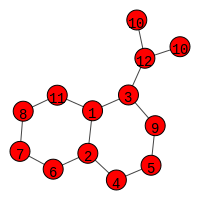

Graph G2



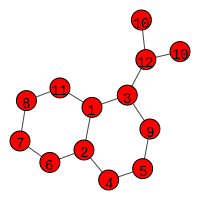

Iteration :6
Graph G1



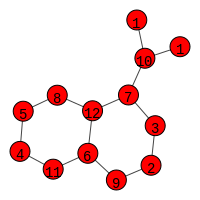

Graph G2



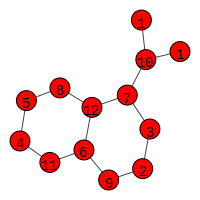

Iteration :7
Graph G1



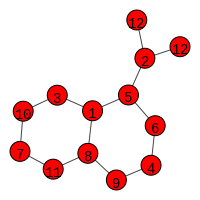

Graph G2



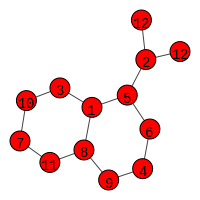

Iteration :8
Graph G1



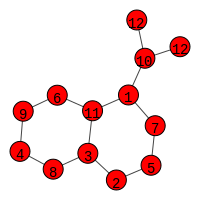

Graph G2



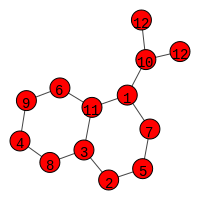

Iteration :9
Graph G1



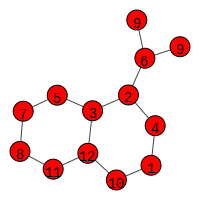

Graph G2



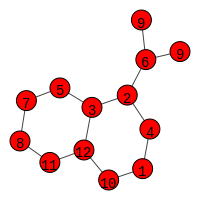

Iteration :10
Graph G1



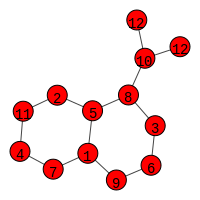

Graph G2



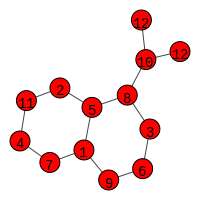

Iteration :11
Graph G1



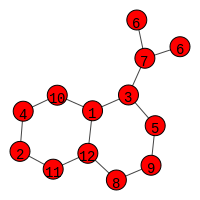

Graph G2



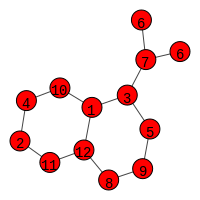

Iteration :12
Graph G1



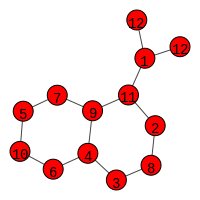

Graph G2



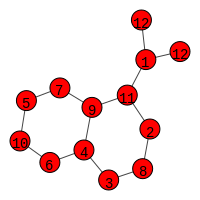

None


In [ ]:
print(weisfeiler_lehman_test(G0,G1))

Example for testing isomorphism of graphs 

In [ ]:
import collections
compare = lambda x, y: collections.Counter(x) == collections.Counter(y)
compare(map(tuple,[['1','2','3'],['1','2'],['3'],['3']]), map(tuple , [['3'],['1','2','3'],['1','2']] ))

False

In [ ]:
#weisfeiler lehman subtree kernel
def weisfeiler_lehman_subtree_kernel():


In [ ]:

def weisfeiler_lehman_edge_kernel():
